# 대한민국 출산율에 관한 통계분석으로 해결방안 알아보기

# 데이터 분석
## - 데이터 선정:
###    1. 국가 공개포털 KOSIS
	    - 근로소득 정보
		- 지역별 인구수
		- 연령별 출산율
		- 합계 출산율
		- 인구밀도
		- 신혼 부부
###    2. 한국부동산원 부동산통계정보시스템(R-ONE)
	    - 거주지 평균 매매가
		 - 서울·경기 평균 매매가

## - 데이터 분석과 해석:
   - 현재 출산율이 얼마 얼마나 떨어졌는가?
   - 신혼부부에 수는 어떻게 되는가?
   - 맞벌이 비율
   - 주택 소유율
   - 5년간 출산 연령대는 어떻게 되는가?
   - 월급과 주택에 비교로 현재 심적부담이 어느정도로 강해졌는지 알아보기

In [1]:
import sys
if 'google.colab' in sys.modules:
    get_ipython().system("echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections")
    # 나눔 폰트를 설치합니다.
    get_ipython().system('sudo apt-get -qq -y install fonts-nanum')
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [2]:
# 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd
mpl.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.font_manager as fm
#%% 폰트위치
font_files = fm.findSystemFonts(fontpaths=['C:/Users/moon/AppData/Local/Microsoft/Windows/Fonts'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)
import os
os.chdir('C:\Python\Syntex\따로 공부\출산율')

# 출산율이 현재 사회에 얼마나 큰 이슈인지 알아보기

In [3]:
# 분석배경
df = pd.read_csv('기사제목.csv')
df

,기사제목
0,"'주4일 근무' 충남도, 24시간 365일 완전 돌봄 약속"
1,‘파리지앵’들이 사라지는 이유[조은아의 유로노믹스]
2,세종시 '출산율 제고' 방안 내놔...냉동난자 사용 보조생식술 지원 첫 시행
3,2030년 세계 인구 전환점이 온다
4,군포시 '필수 가임력 검사비' 지원…출산율 높이기 총력
...,...
65,"""엄마 놀이터에 친구가 없어""…놀이 기구 대신 자리 잡는 어르신 의자들"
66,경북 유일 신생아 집중 치료 시설 개소...저출생 극복 디딤돌
67,"""경력단절 우려에 출산율 하락…노동시장 이중구조 개혁해야"""
68,‘10명 출산’ 모성 영웅 칭호…북한도 ‘저출산’ 고민


#### 날마다 기삿거리가 쏟아지는걸 알수 있습니다.
#### 그래서 현 상황이 어떤지 
#### 어떤게 문제점인지 알아보고자 합니다.

### 출산율을 알아보도록 하겠습니다.

In [4]:
# 가장 큰문제인 출산율 확인
file_a = pd.read_excel('출생아수__합계출산율__자연증가_등_20240401151505.xlsx') # 출산율
file_a = file_a.set_index("기본항목별")
ax = file_a.loc["출생아수(명)"]
file_a

,2019,2020,2021,2022,2023
기본항목별,,,,,
출생아수(명),302676.000,272337.000,260562.000,249186.000,230000.00
자연증가건수(명),7566.000,-32611.000,-57118.000,-123753.000,-122800.00
조출생률(천명당),5.900,5.300,5.100,4.900,4.50
자연증가율(천명당),0.100,-0.600,-1.100,-2.400,-2.40
합계출산율(명),0.918,0.837,0.808,0.778,0.72
출생성비(명),105.500,104.800,105.100,104.700,105.10


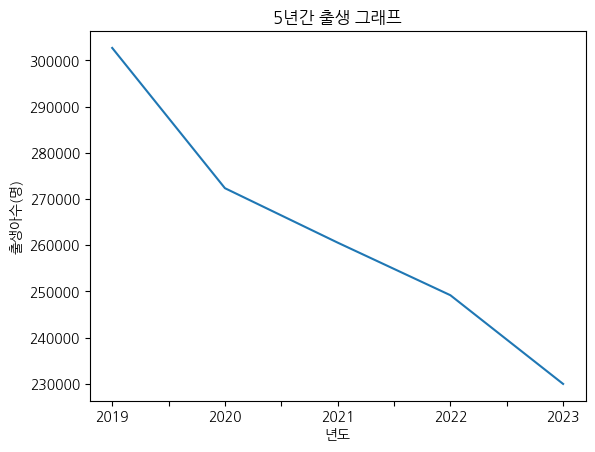

In [5]:
# 그래프
plt.xlabel('년도')
plt.ylabel('출생아수(명)')
plt.title('5년간 출생 그래프')
ax.plot()
ax = pd.DataFrame(ax)

In [6]:
# 2019년부터 2023년까지 출산율
past = ax.iloc[0]  # 과거
today = ax.iloc[4] # 현재
decrease = today.values - past.values # 감소한 인구
birth_rate = np.array((decrease)/ past.values*100,dtype=np.float16) # 퍼센트
print(f'2019년부터 2023년까지 감소한 출산율은 {birth_rate}%입니다.')

2019년부터 2023년까지 감소한 출산율은 [-24.02]%입니다.


##### 매해 신생아들에 수는 굉장히 빠른 속도로 줄어들고있습니다.


In [7]:
#%% 년마다 감소한 수
ax.index.name = "년도"
ax_a = ax.reset_index(drop=False)
ax_a['감소수'] = ax_a['출생아수(명)'].sub(ax_a.loc[ax_a['년도'] == '2019', '출생아수(명)'].iloc[0])
ax_a.set_index('년도',inplace=True)
ax_a

,출생아수(명),감소수
년도,,
2019,302676.0,0.0
2020,272337.0,-30339.0
2021,260562.0,-42114.0
2022,249186.0,-53490.0
2023,230000.0,-72676.0


<Axes: xlabel='년도'>

<Figure size 1200x800 with 0 Axes>

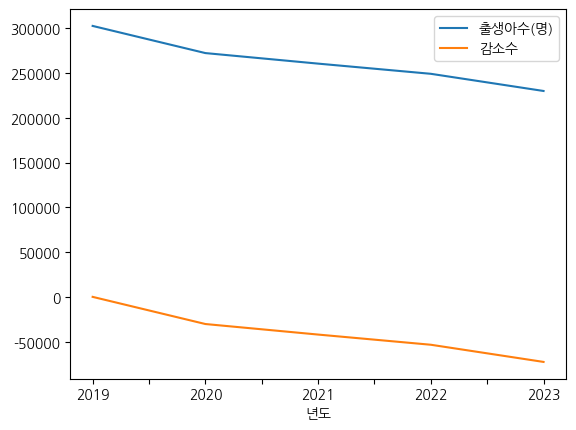

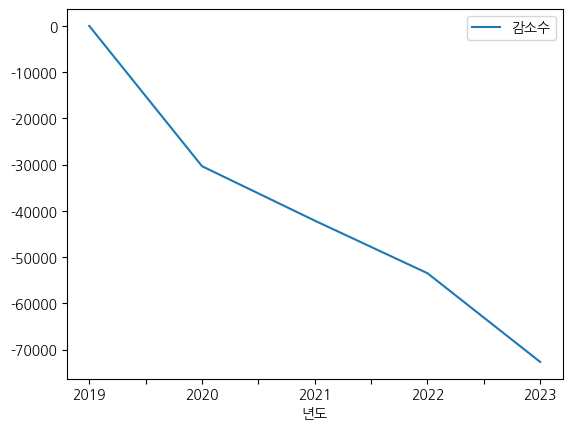

In [8]:
#%% 그래프
ax_b = ax_a.drop(labels='출생아수(명)',axis=1)
plt.figure(figsize=(12, 8))
ax_a.plot()
ax_b.plot()


### 약 5년간 출산율 감소는 -24.02% 합계 출산율은 0.72%인것을 알수 있습니다.

#### 출산율이 감소하는데 여러 요인들이 있겠지만
#### 저는 물가상승률이 가장큰 요인이라고 생각하고
#### 접근해보았습니다.


### 다음에 알아볼것은 신혼,혼인건수부터 연령별 출산율을 통해서
### 현재 상황에서 어떤게 문제인지 조금더 자세히 알아보도록 하겠습니다.


In [9]:
file_b = pd.read_excel('시도별_신혼부부_총괄_20240401160425.xlsx') # 신혼부부
file_c = pd.read_excel('모의_연령별_출산율_20240401162000.xlsx') # 출산 연령층별

In [10]:
# 신혼부부 수
by_year_all = file_b[['행정구역별','2019','2020','2021','2022']].set_index('행정구역별')
by_year = by_year_all.loc['행정구역별':'전국'] # 매해 전국 신혼 부부수
by_year

,2019,2020,2021,2022
행정구역별,,,,
행정구역별,신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A)
전국,1260117,1183750,1101455,1032253


In [11]:
# 2022년  - 227864= 감소한 수 -227864
Decrease_in_newlyweds = by_year.iloc[1,3] - by_year.iloc[1,0]
# [(2022 - 2019) ÷ 2019] × 100 = 감소율 -18.08
Decrease_rate_of_newlyweds = np.array(Decrease_in_newlyweds / by_year.iloc[1,0] * 100,dtype=np.float16)
print(f'2019년부터 2022년까지 줄어든 인구수 : {Decrease_in_newlyweds}')
print(f'2019년도부터 2022년까지에 감소율은 : {Decrease_rate_of_newlyweds}')

2019년부터 2022년까지 줄어든 인구수 : -227864
2019년도부터 2022년까지에 감소율은 : -18.078125


In [12]:
# 맞벌이 비율
Dual_income_ratio = file_b[['행정구역별','2019.2','2020.2','2021.2','2022.2']].set_index('행정구역별').loc['행정구역별':'전국']
Dual_income_ratio_A = Dual_income_ratio.iloc[1,3] - Dual_income_ratio.iloc[1,0]
# 주택보유 비율
Homeownership_ratio= file_b[['행정구역별','2019.4','2020.4','2021.4','2022.4']].set_index('행정구역별').loc['행정구역별':'전국']
Dual_income_ratio

,2019.2,2020.2,2021.2,2022.2
행정구역별,,,,
행정구역별,맞벌이 비율 (B/A*100),맞벌이 비율 (B/A*100),맞벌이 비율 (B/A*100),맞벌이 비율 (B/A*100)
전국,46.3,49,51.7,53.8


In [13]:
print(f'2019년부터 2022년까지 총 {Dual_income_ratio_A}% 증가했습니다.')

2019년부터 2022년까지 총 7.5% 증가했습니다.


In [14]:
Homeownership_ratio

,2019.4,2020.4,2021.4,2022.4
행정구역별,,,,
행정구역별,주택 소유율 (C/A*100),주택 소유율 (C/A*100),주택 소유율 (C/A*100),주택 소유율 (C/A*100)
전국,44.2,43.6,43.6,42.4


([<matplotlib.axis.XTick at 0x1b57de58f50>,
 [Text(0.0, 0, '2019'),
  Text(4.0, 0, '2020'),
  Text(8.0, 0, '2021'),
  Text(12.0, 0, '2022')])

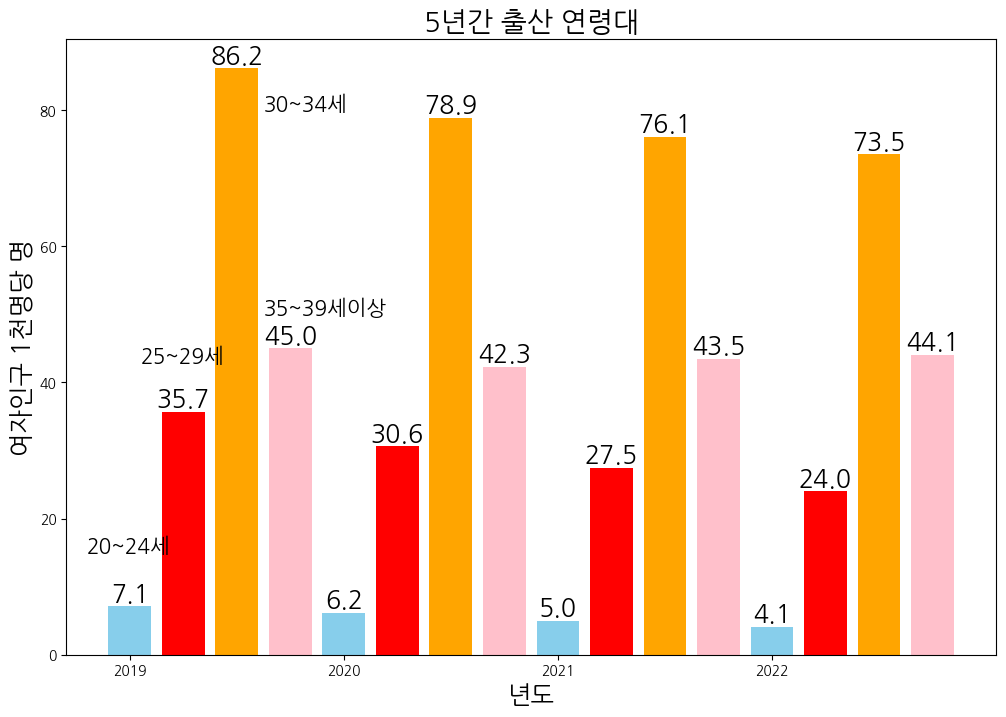

In [15]:
By_age = file_c.iloc[[0,1]].set_index('행정구역별') # 전국 해당연령의 출산수
x = By_age.iloc[0]
y = By_age.iloc[1]
plt.figure(figsize=(12, 8))
xy = plt.bar(x.index,y.values,color = ['skyblue','r','orange','pink'])
plt.title('5년간 출산 연령대',fontsize=20)
plt.text(-0.8,15, "20~24세",fontsize=15)
plt.text(0.2,43, "25~29세",fontsize=15)
plt.text(2.5,80, "30~34세",fontsize=15)
plt.text(2.5,50, "35~39세이상",fontsize=15)
plt.xlabel("년도", fontsize=18)
for rect in xy:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 18)
plt.ylabel("여자인구 1천명당 명", fontsize=18)
plt.xticks(['2019','2020','2021','2022'],['2019','2020','2021','2022'])



#### 통계를 보면 출산은 대체적으로 30대가 주를
#### 이루고 있지만 그조차 줄어들고 있는 추세고
#### 계속되는 인구 감소로 인한 젋은 층의 수는 줄어들고
#### 그 젋은 층이 감당해야 할 부양층들의 수가 늘어 더욱 더
#### 젋은 층은 부담감이 강해질것으로 예상 할 수 있습니다.
#### 또한 전체통계 자료를 확인해보면
#### 결혼 비율,주택보유 비율,출산율은 현저히 떨어지고 있는 반면에
#### 맞벌이 비율만 계속적으로 올라가는것을 볼 수 있습니다.
#### 그럼에도 부담감은 증가하는것을 알수 있습니다.


In [16]:
# 월급과 주택에 비례로 물가 상승률을 알아보자
file_d = pd.read_excel('가구당_월평균_가계수지__전국_1인이상__20240401152509.xlsx') # 1인당 월급

Earned_income_by_year = file_d[['가계수지항목별','2019.1/4.1','2020.1/4.1','2021.1/4.1','2022.1/4.1','2023.1/4.1']].set_index('가계수지항목별').iloc[[0,1,3]]

year19 = int(Earned_income_by_year.iloc[2,0]/Earned_income_by_year.iloc[1,0])
year23 = int(Earned_income_by_year.iloc[2,4]/Earned_income_by_year.iloc[1,4])
# 5년간 오른 근로소득의 비율
years_5 = np.array((year23-year19 ) / year19 * 100,dtype=np.float16)
Earned_income_by_year

,2019.1/4.1,2020.1/4.1,2021.1/4.1,2022.1/4.1,2023.1/4.1
가계수지항목별,,,,,
가계수지항목별,근로자가구,근로자가구,근로자가구,근로자가구,근로자가구
가구원수 (명),2.61,2.53,2.49,2.44,2.39
근로소득,4448305,4472808,4494651,4810484,5102737


In [17]:
print(f'5년간 근로소득에 증가률 : {years_5}% 입니다')

5년간 근로소득에 증가률 : 25.265625% 입니다


In [18]:
# 5년간 오른 집값과 인구밀도
# 28881093 x 100 / 51849861 계산식
# 5년동안 서울 인근 지역이 전체 인구에 몇퍼센트 차지하는지
file_e = pd.read_excel('행정구역_시군구_별_인구수_20240403155513.xlsx')
population = file_e.iloc[[0,1,2,10]].set_index('행정구역(시군구)별')
Population_near_Seoul = population.iloc[2] + population.iloc[3] # 서울과 근교 경기도의 합
Percentage_of_population_near_Seoul = Population_near_Seoul*100/population.iloc[1] # 전체 인구수에 차지하는 서울근교에 비율
population

,2019,2020,2021,2022,2023,2024
행정구역(시군구)별,,,,,,
행정구역(시군구)별,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
전국,51849861,51829023,51638809,51439038,51325329,51313912
서울특별시,9729107,9668465,9509458,9428372,9386034,9384325
경기도,13239666,13427014,13565450,13589432,13630821,13635250


In [19]:
Percentage_of_population_near_Seoul

2019     44.29862
2020      44.5609
2021    44.685206
2022    44.747734
2023    44.845022
2024      44.8603
dtype: object

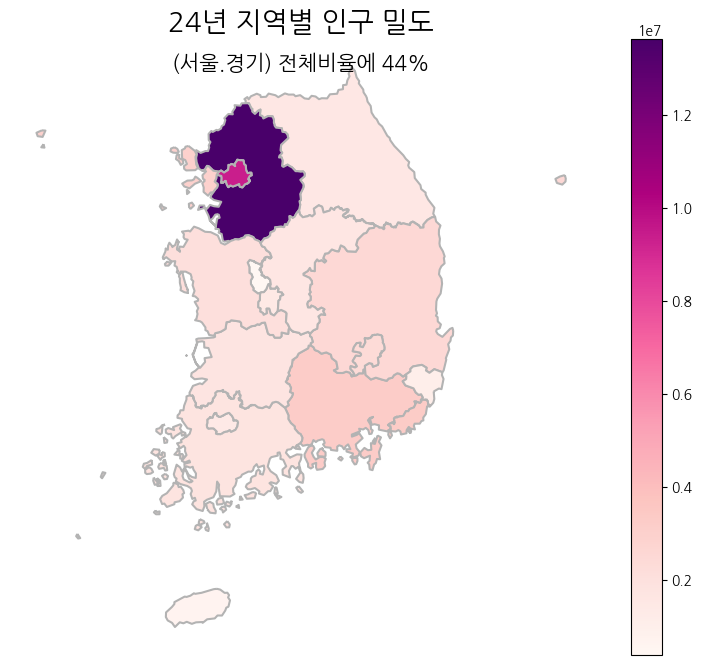

In [20]:
# 한국 지도 읽어오기

korea_map = gpd.read_file('C:/Python/Syntex/따로 공부/출산율/TL_SCCO_CTPRVN.json')
korea_map['CTP_KOR_NM'] = korea_map['CTP_KOR_NM'].astype(str)
# 데이터 읽어오기
population_data = pd.read_excel('C:/Python/Syntex/따로 공부/출산율/24년_지역별_인구수.xlsx')

# 인구 데이터를 한국 지도에 포함시키기
merged_data = korea_map.merge(population_data, how='left', left_on='CTP_KOR_NM', right_on='행정구역(시군구)별')

# 지도 표시
fig, ax = plt.subplots(figsize=(10, 8))

# 설정
merged_data.plot(column='인구수', cmap='RdPu', linewidth=1.5, ax=ax, edgecolor='0.7', legend=True, missing_kwds={'color': 'lightgrey'})
plt.text(0.5, 0.95, "(서울.경기) 전체비율에 44%", fontsize=15, ha='center', transform=ax.transAxes)
ax.set_title('24년 지역별 인구 밀도',fontsize=20)
ax.axis('off') 
plt.show()

#### 인구수는 감소하는 추세에도
#### 서울근교 인구수는 조금씩 올라가는 추세입니다.
#### 만약 수도권으로 범위를 넓힌다면 전체인구가 절반이상이 수도권에 몰려있는것을 알 수 있습니다.

In [21]:
# 단위는 천원
# 전국 수도권 지방
file_f = pd.read_excel('평균매매가격_단독.xlsx')
file_g = pd.read_excel('평균매매가격_아파트.xlsx')
file_h = pd.read_excel('평균매매가격_연립다세대.xlsx')
# 서울 경기
file_i = pd.read_excel('서울.경기_평균매매가격_단독.xlsx')
file_j = pd.read_excel('서울.경기_평균매매가격_아파트.xlsx')
file_k = pd.read_excel('서울.경기_평균매매가격_연립다세대.xlsx')
# 5년간

In [22]:
# 증감률 구하는 함수
def Nationwide(df):
    changes = [] # 증감률
    for i in df.index:
        val1 = df.iloc[i,1]   # 2019년도
        val1_1 = df.iloc[i,5] # 2023년도
        change = np.array((val1_1 - val1) / val1 * 100, dtype=np.float16) # 공식
        changes.append(change)
    return changes

In [23]:
single = Nationwide(file_f)              # (전국,수도권,지방 5년간 증가율 - 단독)
Metropolitan_area = Nationwide(file_g)   # (전국,수도권,지방 5년간 증가율 - 아파트)
province = Nationwide(file_h)            # (전국,수도권,지방 5년간 증가율 - 연립다세대)
single_A = Nationwide(file_i)            # (서울,경기 5년간 증가율 - 단독)
Metropolitan_area_B = Nationwide(file_j) # (서울,경기 5년간 증가율 - 아파트)
province_C = Nationwide(file_k)          # (서울,경기 5년간 증가율 - 연립다세대) 

In [24]:
Increment_rate_A = pd.DataFrame(data = [single,Metropolitan_area,province],columns = ['전국','수도권','지방권'],index = ['단독','아파트','연립다세대'])
Increment_rate_A

,전국,수도권,지방권
단독,24.44,20.84,19.5
아파트,30.48,35.1,24.17
연립다세대,21.44,33.3,9.14


In [25]:
Increment_rate_B = pd.DataFrame(data = [single_A,Metropolitan_area_B,province_C],columns = ['서울','경기'],index = ['단독','아파트','연립다세대'])
Increment_rate_B

,서울,경기
단독,19.3,26.84
아파트,28.78,48.0
연립다세대,32.72,29.95


In [26]:
# 5년전 기록과 현재 기록을 바탕으로 통계

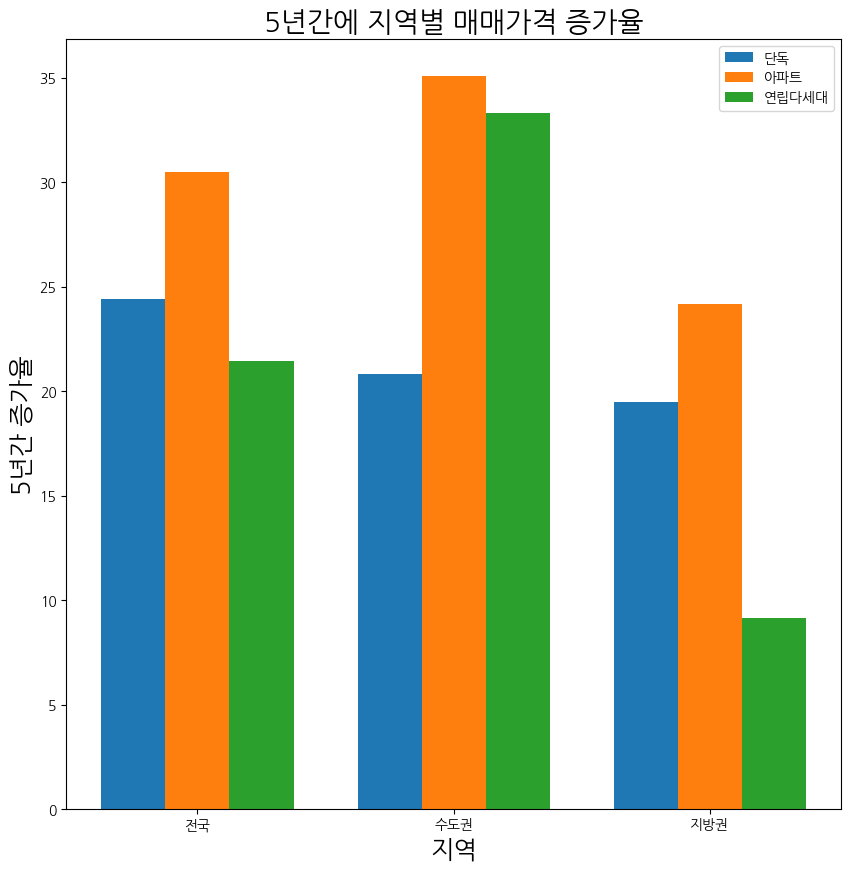

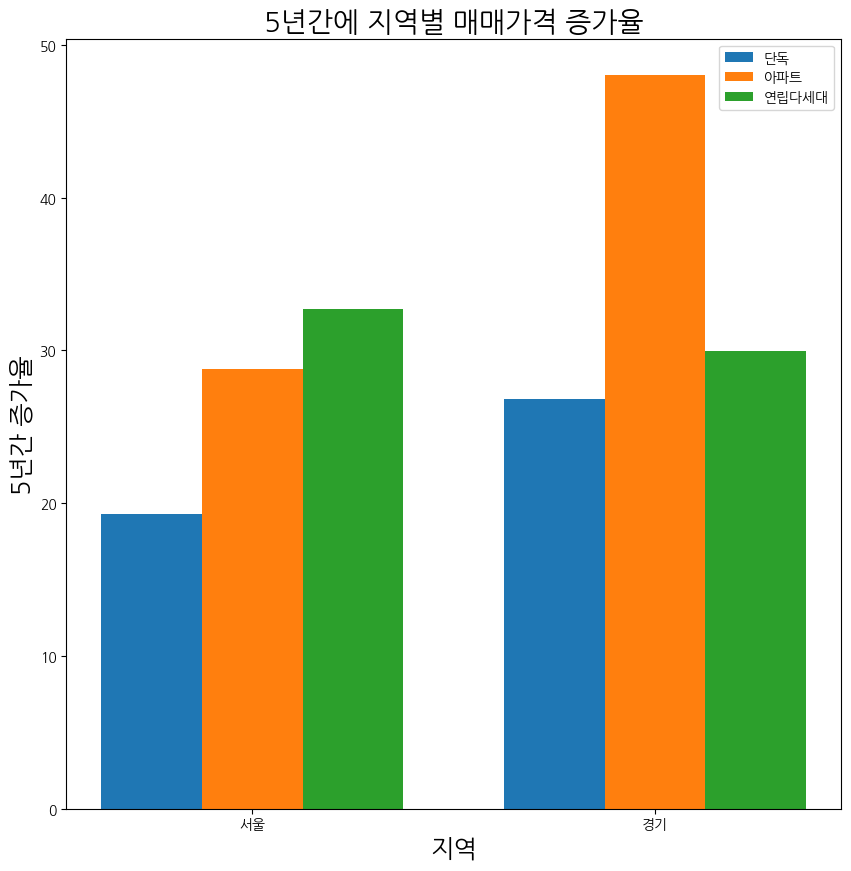

In [27]:
# 통계낸 자료 그래프 함수
def xybar(df):
    index = df.index
    colums = df.columns
    values = df.values   
    fig, ax = plt.subplots(figsize=(10, 10))
    bar_width = 0.25
    ind = range(len(colums))
    for i, y in enumerate(values):
        ax.bar([x + i * bar_width for x in ind], y, bar_width, label=index[i])
    ax.set_xlabel('지역',fontsize=18)
    ax.set_ylabel('5년간 증가율',fontsize=18)
    ax.set_title('5년간에 지역별 매매가격 증가율',fontsize=20)
    ax.set_xticks([x + bar_width for x in ind])
    ax.set_xticklabels(colums)
    ax.legend()

    plt.show()
A = xybar(Increment_rate_A)
B = xybar(Increment_rate_B)


#### 통계 자료를 확인해보면 1인당 소득 기준은 25.27%정도 오른것에 반면
#### 가장 많은 인구수가 있는 경기 기준
#### 적게는 26.84% 많게는 48%가량 오른것을 확인해 볼수 있습니다.
#### 이런 데이터로 가지고 유추해 볼수 있는것은
#### 사람들에 노동소득만으로는 결혼,자녀에 부담감이 올라갈수밖에 없는것을
#### 알수 있습니다.


## - 분석 활용:
    - 과거보다 현재에 2030에 부담감이 해결되지 않으면 출산율은 오르지 않을 것입니다.
	- 부담감을 줄여주기위해 정책은 필수라고 생각합니다.

### 신혼부부 혜택 증가하는 정책:
    - 주거지에 대한 불안을 해소하기 위해 민간분양,매매대출같은 정책을 강화
    - 양육비용 지원(출산장려금,아동수당)같은 정책에 조건 완화
    - 맞벌이 부부가 증가함으로 혼자있는 아이들을 위해 돌봄·교육같은 혜택 증가로 부담감 감소
    - 건강한 아이를 키우기 위해 아이에 대한 교육을 예비 부모들에게 의무화
      (그 과정에 불이익은 없게 정책)
